In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def subsample(array, factor, method='mean'):
    """
    Subsample an array by a factor. Using the given method
    """
    if method == 'mean':
        return np.mean(array.reshape(-1, factor), axis=1)
    elif method == 'median':
        return np.median(array.reshape(-1, factor), axis=1)
    else:
        raise ValueError('Method not supported')


def nearestEvenDenominator(number, denominator):
    """
    Returns the nearest even denominator of the given number that produces no remainder
    """
    while number % denominator != 0:
        denominator -= 1
    return denominator

In [4]:
nearestEvenDenominator(2048, 100)

64

In [119]:
def noteA(x):
    """
    Returns the frequency of a note A
    """
    return 440 * 2**((x-69)/12)


M = 10
D = np.zeros(M)
ptr = 0

def delayline(x, ptr):
    y = D[ptr]
    D[ptr] = x
    ptr = (ptr + 1) % M

    return y, ptr


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.06342392 0.12659245 0.18925124
 0.25114799 0.31203345 0.37166246 0.42979491 0.48619674 0.54064082
 0.59290793 0.64278761 0.69007901 0.73459171 0.77614646 0.81457595
 0.84972543 0.88145336 0.909632   0.93414786 0.95490224 0.97181157
 0.98480775 0.99383846 0.99886734 0.99987413 0.99685478 0.98982144
 0.97880245 0.96384216 0.94500082 0.92235429 0.89599377 0.8660254
 0.83256985 0.79576184 0.75574957 0.71269417 0.666769   0.61815899
 0.56705986 0.51367739 0.45822652 0.40093054 0.34202014 0.28

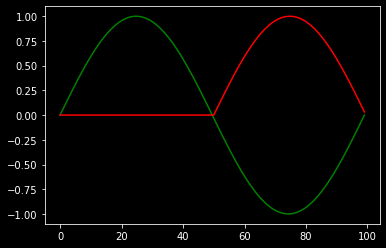

In [120]:
M = 50
D = np.zeros(M)
ptr = 0


x = np.sin(np.linspace(0, 2*np.pi, 100))
d = np.zeros(100)
for i in range(100):
    d[i], ptr = delayline(x[i], ptr)
plt.plot(x, c='g')
plt.plot(d, c='r')

print(d)

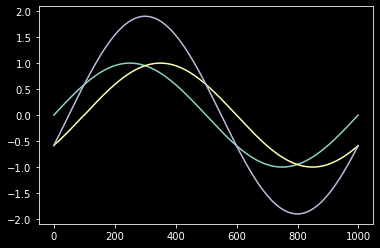

In [121]:
x = np.sin(np.linspace(0, 2*np.pi, 1000))

delay = np.roll(x, 100)

plt.plot(x)
plt.plot(delay)
plt.plot(x + delay)

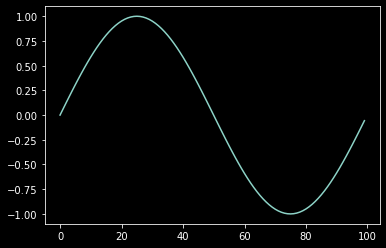

In [122]:
plt.plot(x[::10])



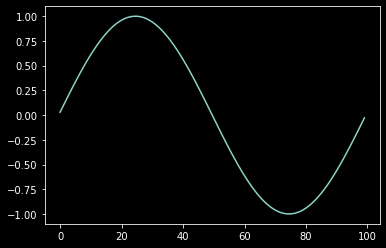

In [123]:
plt.plot(subsample(x, 10, 'mean'))
